# T028 · Kinase similarity: Compare different perspectives

Authors:

- Talia B. Kimber, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Andrea Volkamer, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

We will compare different perspectives on kinase similarity, which were discussed in detail in previous notebooks:

* **Talktorial T024**: Kinase pocket sequences (KLIFS pocket sequences)
* **Talktorial T025**: Kinase pocket structures (KiSSim fingerprint based on KLIFS pocket residues)
* **Talktorial T026**: Kinase-ligand interaction profiles (KLIFS IFPs based on KLIFS pocket residues)
* **Talktorial T027**: Ligand profiling data

### Contents in *Theory*

* Kinase dataset
* Kinase similarity descriptor (considering 4 different aspects)

### Contents in *Practical*

* Retrieve and preprocess data
* Show kinase coverage
* Compare kinases
* Visualize similarity as kinase matrix
* Visualize similarity as phylogenetic tree

### References

* Kinase dataset: [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629) 

## Theory

### Kinase dataset

We use the kinase selection as defined in __Talktorial T023__.

### Kinase similarity descriptor (considering 4 different aspects)

- __Talktorial T024__ = KLIFS pocket sequence
- __Talktorial T025__ = KiSSim fingerprint
- __Talktorial T026__ = KLIFS interaction fingerprint
- __Talktorial T027__ = Ligand profile: ChEMBL29, bioactivity

## Practical

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix, distance
from scipy.cluster import hierarchy

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Load kinase matrices

We define the paths to the kinase distance matrices.

In [3]:
kinase_distance_matrix_paths = {
    "sequence": "T024_kinase_similarity_sequence",
    "kissim": "T025_kinase_similarity_kissim",
    "ifp": "T026_kinase_similarity_ifp",
    "ligand-profile": "T027_kinase_similarity_ligand_profile"
}
kinase_distance_matrix_paths = {
    perspective: HERE / f"../{folder_name}/data/kinase_distance_matrix.csv" 
    for perspective, folder_name in kinase_distance_matrix_paths.items()
}

We load the distance matrices.

In [4]:
kinase_distance_matrices = {}
for kinsim_perspective, path in kinase_distance_matrix_paths.items():
    kinase_distance_matrices[kinsim_perspective] = pd.read_csv(path, index_col=0).round(6)

We check if the matrices have the same dimensions

In [5]:
for descriptor, similarity_df in kinase_distance_matrices.items():
    print(f"Shape of {descriptor} matrix: {similarity_df.shape}")

Shape of sequence matrix: (9, 9)
Shape of kissim matrix: (9, 9)
Shape of ifp matrix: (9, 9)
Shape of ligand-profile matrix: (9, 9)


We check the distances.

In [6]:
kinase_distance_matrices

{'sequence':            EGFR     ErbB2     p110a       KDR      BRAF      CDK2       LCK  \
 EGFR   0.000000  0.059037  0.572938  0.283953  0.344972  0.351553  0.288679   
 ErbB2  0.059037  0.000000  0.586362  0.297882  0.345400  0.369692  0.314925   
 p110a  0.572938  0.586362  0.000000  0.577295  0.563541  0.576006  0.548664   
 KDR    0.283953  0.297882  0.577295  0.000000  0.328732  0.346621  0.312352   
 BRAF   0.344972  0.345400  0.563541  0.328732  0.000000  0.353245  0.327067   
 CDK2   0.351553  0.369692  0.576006  0.346621  0.353245  0.000000  0.318747   
 LCK    0.288679  0.314925  0.548664  0.312352  0.327067  0.318747  0.000000   
 MET    0.288742  0.302033  0.606301  0.286194  0.361842  0.343975  0.309121   
 p38a   0.355356  0.364827  0.568806  0.346556  0.362088  0.276907  0.337419   
 
             MET      p38a  
 EGFR   0.288742  0.355356  
 ErbB2  0.302033  0.364827  
 p110a  0.606301  0.568806  
 KDR    0.286194  0.346556  
 BRAF   0.361842  0.362088  
 CDK2   0.34

### Visualize similarity for example perspective

In [7]:
print(f"Choices of precalculated descriptors: {kinase_distance_matrix_paths.keys()}")

Choices of precalculated descriptors: dict_keys(['sequence', 'kissim', 'ifp', 'ligand-profile'])


We look at an example matrix:

In [8]:
descriptor_selection = "sequence"

In [9]:
kinase_distance_matrix = kinase_distance_matrices[descriptor_selection]
kinase_distance_matrix

,EGFR,ErbB2,p110a,KDR,BRAF,CDK2,LCK,MET,p38a
EGFR,0.000000,0.059037,0.572938,0.283953,0.344972,0.351553,0.288679,0.288742,0.355356
ErbB2,0.059037,0.000000,0.586362,0.297882,0.345400,0.369692,0.314925,0.302033,0.364827
p110a,0.572938,0.586362,0.000000,0.577295,0.563541,0.576006,0.548664,0.606301,0.568806
KDR,0.283953,0.297882,0.577295,0.000000,0.328732,0.346621,0.312352,0.286194,0.346556
BRAF,0.344972,0.345400,0.563541,0.328732,0.000000,0.353245,0.327067,0.361842,0.362088
CDK2,0.351553,0.369692,0.576006,0.346621,0.353245,0.000000,0.318747,0.343975,0.276907
LCK,0.288679,0.314925,0.548664,0.312352,0.327067,0.318747,0.000000,0.309121,0.337419
MET,0.288742,0.302033,0.606301,0.286194,0.361842,0.343975,0.309121,0.000000,0.370645
p38a,0.355356,0.364827,0.568806,0.346556,0.362088,0.276907,0.337419,0.370645,0.000000


#### Visualize kinase matrix

We visualize the kinase matrix in the form of a heatmap.

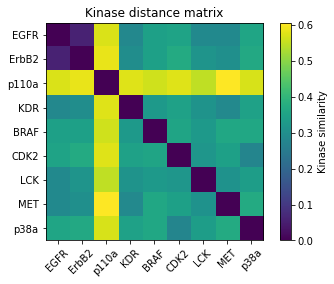

In [10]:
plt.imshow(kinase_distance_matrix)
plt.colorbar(label="Kinase similarity")
plt.title("Kinase distance matrix")
kinase_names = kinase_distance_matrix.columns.to_list()
plt.xticks(ticks=range(0, len(kinase_names)), labels=kinase_names, rotation=45)
plt.yticks(ticks=range(0, len(kinase_names)), labels=kinase_names);

#### Visualize similarity as dendrogram

We use the `scipy` function `squareform` to create a condensed vector of the distance matrix of shape $n*(n-1)/2$, where $n$ is the shape of the quadratic distance matrix. The values in this vector correspond to the values of the lower triangular matrix.

In [11]:
D = kinase_distance_matrix.values
D_condensed = distance.squareform(D)
D_condensed

array([0.059037, 0.572938, 0.283953, 0.344972, 0.351553, 0.288679,
       0.288742, 0.355356, 0.586362, 0.297882, 0.3454  , 0.369692,
       0.314925, 0.302033, 0.364827, 0.577295, 0.563541, 0.576006,
       0.548664, 0.606301, 0.568806, 0.328732, 0.346621, 0.312352,
       0.286194, 0.346556, 0.353245, 0.327067, 0.361842, 0.362088,
       0.318747, 0.343975, 0.276907, 0.309121, 0.337419, 0.370645])

We can submit this condensed vector to a hierarchical clustering to extract the relationship between the different kinases. We use here `method="average"`, which stands for the linkage method UPGMA (unweighted pair group method with arithmetic mean). This means that the distance between two clusters A and B is defined as the average of all distances between pairs of elements in clusters A and B. At each clustering step, the two clusters with the lowest average distance are combined.

In [12]:
hclust = hierarchy.linkage(D_condensed, method="average")

We now generate a phylogenetic tree based on our clustering.

In [13]:
tree = hierarchy.to_tree(hclust)

We visualize this tree as dendrogram.

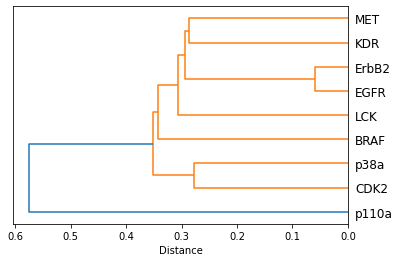

In [14]:
fig, ax = plt.subplots()
labels = kinase_distance_matrix.columns.to_list()
hierarchy.dendrogram(hclust, labels=labels, orientation="left", ax=ax)
ax.set_xlabel("Distance");

### Visualize similarities from different perspectives

#### Normalize different matrices 

We normalize the different matrices to values in $[0, 1]$.

In [15]:
def _min_max_normalize(distance_matrix_df):
    """
    Apply min-max normalization to input DataFrame.
    
    Parameters
    ----------
    kinase_distance_matrix_df : pd.DataFrame
        Kinase distance matrix.

    Returns
    -------
    pd.DataFrame
        Normalized kinase distance matrix.
    """
    min_ = distance_matrix_df.min().min()
    max_ = distance_matrix_df.max().max()
    distance_matrix_normalized_df = (distance_matrix_df - min_) / (max_ - min_)
    return distance_matrix_normalized_df

In [16]:
kinase_distance_matrices_normalized = {}
for descriptor, similarity_df in kinase_distance_matrices.items():
    similarity_normalized_df = _min_max_normalize(similarity_df)
    kinase_distance_matrices_normalized[descriptor] = similarity_normalized_df

#### Define kinase order

In [17]:
kinases_names = kinase_distance_matrices_normalized["sequence"].columns

In [18]:
def _define_kinase_order(kinase_distance_matrix_df, kinase_names):
    """
    Define the order in which kinases shall
    appear in the input DataFrame.
    
    Parameters
    ----------
    kinase_distance_matrix_df : pd.DataFrame
        Kinase distance matrix.
    kinase_name : list of str
        List of kinase names to be used for sorting.

    Returns
    -------
    pd.DataFrame
        Kinase distance matrix with sorted columns/rows.
    """
    kinase_distance_matrix_df = kinase_distance_matrix_df \
        .reindex(kinases_names, axis=1) \
        .reindex(kinases_names, axis=0)
    return kinase_distance_matrix_df

In [19]:
kinase_distance_matrices_normalized = {
    descriptor: _define_kinase_order(similarity_df, kinase_names) 
    for descriptor, similarity_df in kinase_distance_matrices_normalized.items()
}

#### Visualize kinase similarities

In [20]:
def heatmap(distance_matrix, ax=None, title=""):
    """TODO"""
    #plt.imshow(kinase_distance_matrix, vmin=0.0, vmax=1.0)
    ax.imshow(distance_matrix)
    #ax.colorbar(label="Kinase similarity")
    ax.set_title(title)
    kinase_names = distance_matrix.columns.to_list()
    ax.set_xticks(ticks=range(0, len(kinase_names)))
    ax.set_xticklabels(labels=kinase_names, rotation=45)
    ax.set_yticks(ticks=range(0, len(kinase_names)))
    ax.set_yticklabels(labels=kinase_names)

In [21]:
def dendrogram(distance_matrix, ax=None, title=""):
    """TODO"""
    D = distance_matrix.values
    D_condensed = distance.squareform(D)
    hclust = hierarchy.linkage(D_condensed, method="average")
    tree = hierarchy.to_tree(hclust)
    labels = distance_matrix.columns.to_list()
    hierarchy.dendrogram(hclust, labels=labels, orientation="left", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Distance")

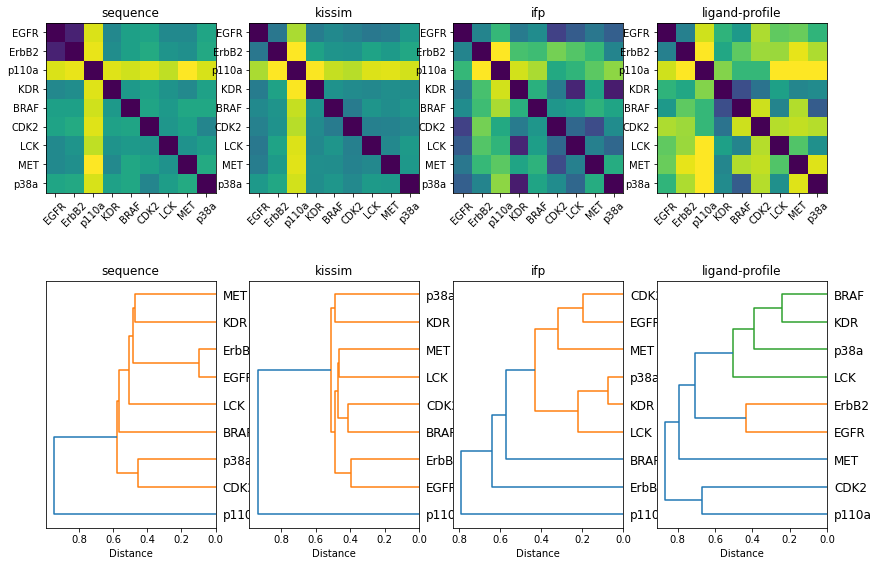

In [22]:
n_perspectives = len(kinase_distance_matrices_normalized)
fig, axes = plt.subplots(2, n_perspectives, figsize=(n_perspectives*3.5, 10))
for i, (perspective, matrix) in enumerate(kinase_distance_matrices_normalized.items()):
    heatmap(matrix, ax=axes[0][i], title=perspective)
    dendrogram(matrix, ax=axes[1][i], title=perspective)

We load here again the input kinase information that we defined in __Talktorial T023__.

In [23]:
kinase_selection_df = pd.read_csv(HERE / "../T023_what_is_a_kinase/data/kinase_selection.csv")
kinase_selection_df

,kinase,kinase_klifs,uniprot_id,group,full_kinase_name
0,EGFR,EGFR,P00533,TK,Epidermal growth factor receptor
1,ErbB2,ErbB2,P04626,TK,Erythroblastic leukemia viral oncogene homolog 2
2,PI3K,p110a,P42336,Atypical,Phosphatidylinositol-3-kinase
3,VEGFR2,KDR,P35968,TK,Vascular endothelial growth factor receptor 2
4,BRAF,BRAF,P15056,TKL,Rapidly accelerated fibrosarcoma isoform B
5,CDK2,CDK2,P24941,CMGC,Cyclic-dependent kinase 2
6,LCK,LCK,P06239,TK,Lymphocyte-specific protein tyrosine kinase
7,MET,MET,P08581,TK,Mesenchymal-epithelial transition factor
8,p38a,p38a,Q16539,CMGC,p38 mitogen activated protein kinase alpha


## Discussion

- Both "sequence" and "kissim" group members of the same family close together, while showing dissimilarity to Atypical kinase (PI3K)
- 

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question